In [ ]:
!pip uninstall tensorflow -y
!pip uninstall tf-keras -y # Untuk membersihkan sisa-sisa jika ada
!pip uninstall numpy -y
print("--- Proses uninstall selesai ---")

--- Proses uninstall selesai ---


In [ ]:
!pip install tensorflow
!pip install numpy
print("--- Proses instalasi selesai ---")

  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached typing_extensions-4.14.0-py3-none-any.whl.metadata (3.0 kB)
Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (644.9 MB)
Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
Using cached keras-3.10.0-py3-none-any.whl (1.4 MB)
Using cached typing_extensions-4.14.0-py3-none-any.whl (43 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uni

--- Proses instalasi selesai ---


In [ ]:
# Coba impor TensorFlow lagi setelah instalasi bersih
import tensorflow as tf
import numpy as np # Impor numpy juga untuk verifikasi

print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")

# Coba impor submodul spesifik TensorFlow
try:
    from tensorflow.keras.layers import Dense
    print("Berhasil mengimpor tensorflow.keras.layers.Dense")
except ImportError as e:
    print(f"Gagal mengimpor tensorflow.keras.layers.Dense: {e}")
except Exception as e_general:
    print(f"Error lain saat mengimpor Dense: {e_general}")

TensorFlow version: 2.19.0
NumPy version: 2.1.3
Berhasil mengimpor tensorflow.keras.layers.Dense


Mengunduh data saham...
YF.download() has changed argument auto_adjust default to True
Data untuk BBCA.JK berhasil diunduh.
Data untuk BBRI.JK berhasil diunduh.
Data untuk TLKM.JK berhasil diunduh.
Data untuk BMRI.JK berhasil diunduh.
Data untuk ASII.JK berhasil diunduh.

--- Memproses dan Menampilkan Informasi dari DataFrame Setiap Saham ---

 Informasi untuk Saham: BBCA.JK
Tipe data untuk BBCA.JK: <class 'pandas.core.frame.DataFrame'>

Data Awal (5 baris pertama) untuk BBCA.JK:
Price             Close         High          Low         Open  Volume
Ticker          BBCA.JK      BBCA.JK      BBCA.JK      BBCA.JK BBCA.JK
Date                                                                  
2019-06-03  5047.971191  5047.971191  5047.971191  5047.971191       0
2019-06-04  5047.971191  5047.971191  5047.971191  5047.971191       0
2019-06-05  5047.971191  5047.971191  5047.971191  5047.971191       0
2019-06-06  5047.971191  5047.971191  5047.971191  5047.971191       0
2019-06-07  5047.9

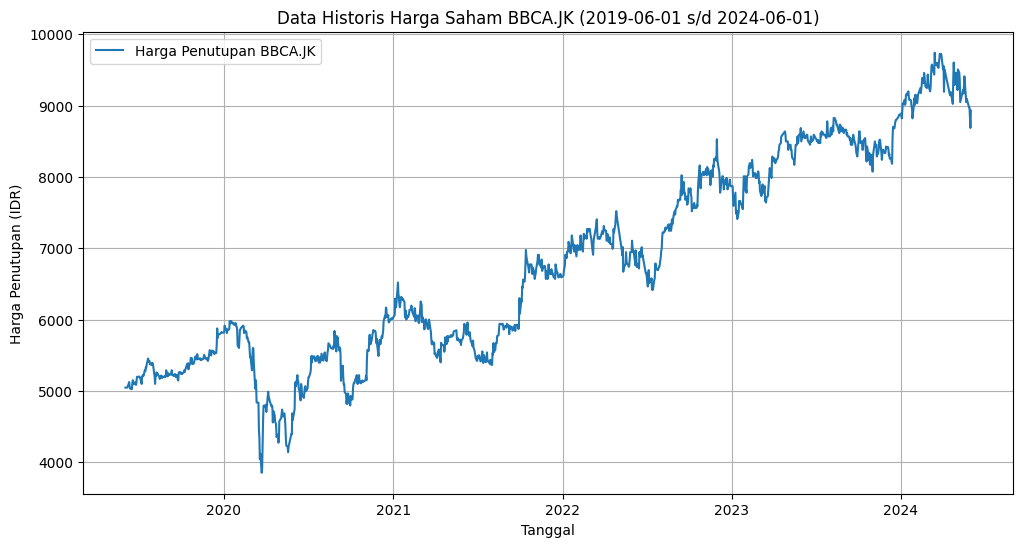

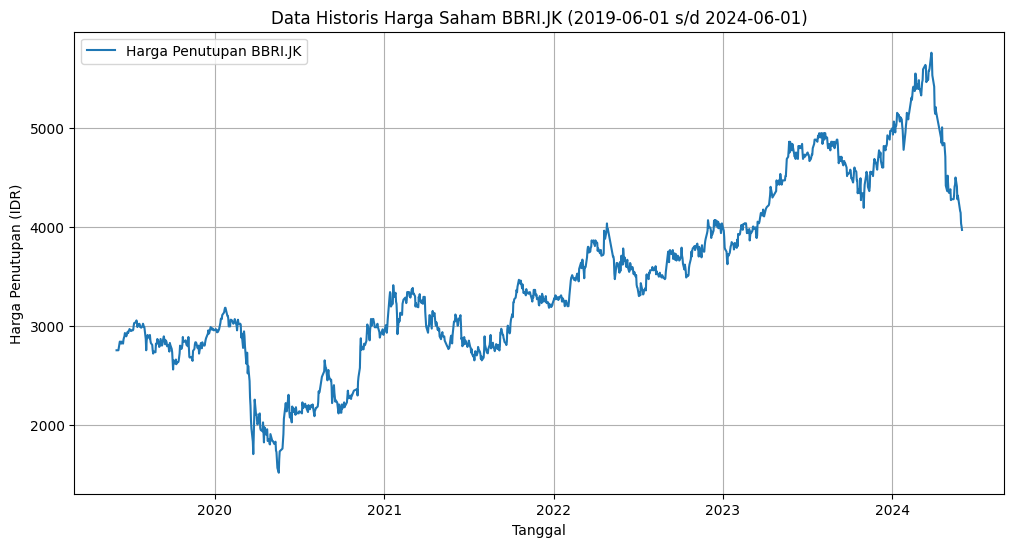

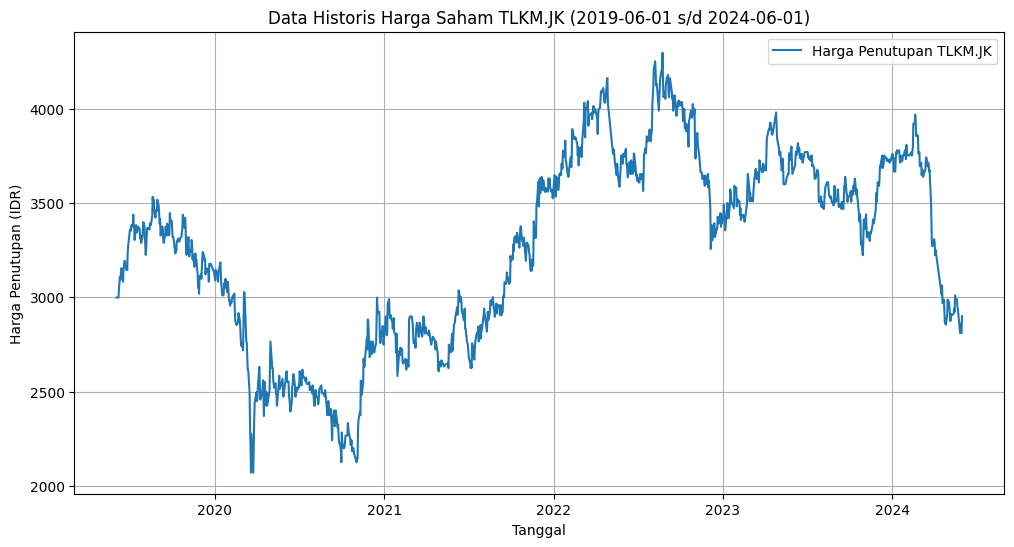

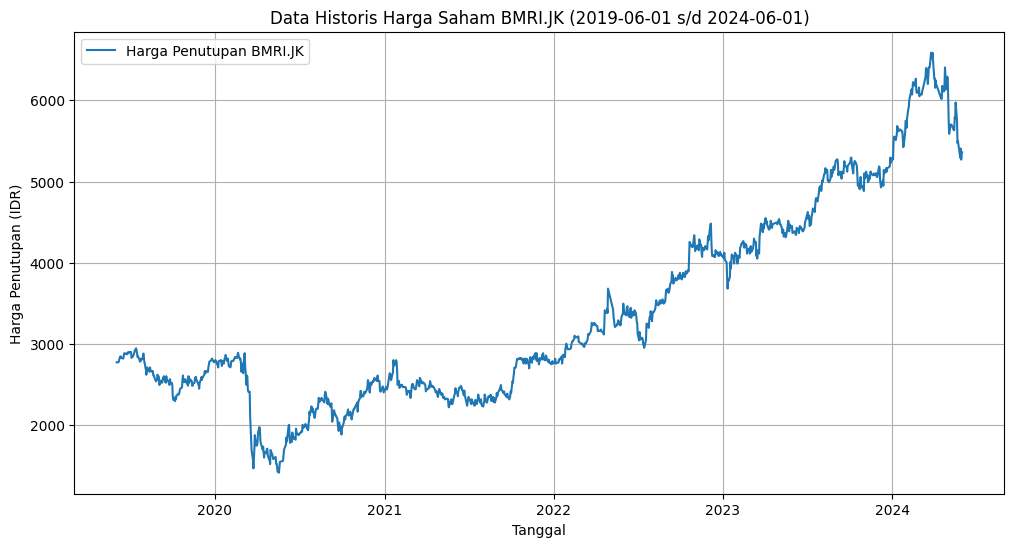

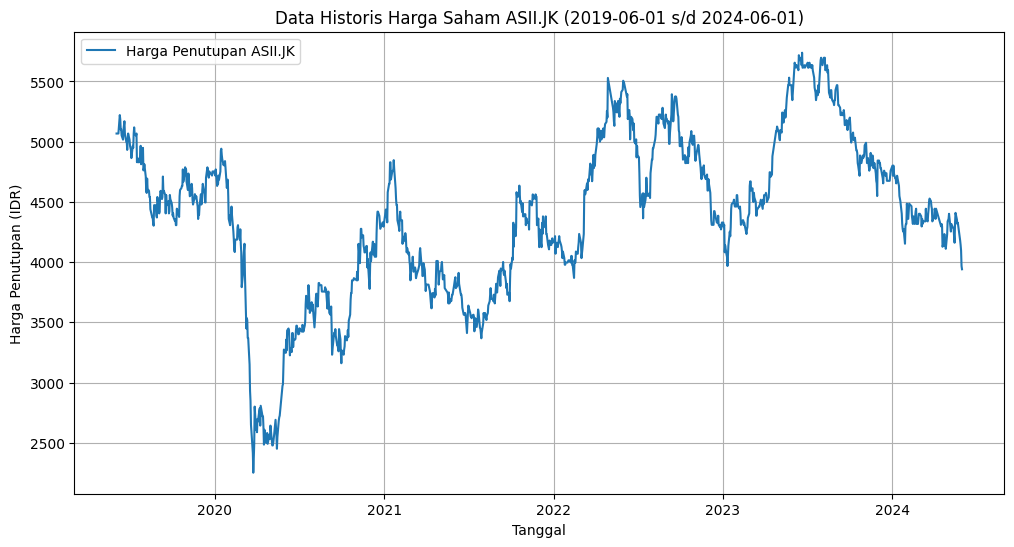

{'BBCA.JK': Price             Close         High          Low         Open     Volume
 Ticker          BBCA.JK      BBCA.JK      BBCA.JK      BBCA.JK    BBCA.JK
 Date                                                                     
 2019-06-03  5047.971191  5047.971191  5047.971191  5047.971191          0
 2019-06-04  5047.971191  5047.971191  5047.971191  5047.971191          0
 2019-06-05  5047.971191  5047.971191  5047.971191  5047.971191          0
 2019-06-06  5047.971191  5047.971191  5047.971191  5047.971191          0
 2019-06-07  5047.971191  5047.971191  5047.971191  5047.971191          0
 ...                 ...          ...          ...          ...        ...
 2024-05-27  8977.612305  9050.012404  8953.478938  8977.612305  128578500
 2024-05-28  8977.612305  9074.145770  8977.612305  8977.612305   73945700
 2024-05-29  8832.812500  9001.746072  8832.812500  8953.479337  117351600
 2024-05-30  8688.011719  8929.345378  8470.811426  8688.011719  207115100
 2024-05-31  8

In [ ]:
import numpy as np
# %%
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# ---------------------------------------------------------------------------
# 1. Identifikasi Saham Blue Chip Pilihan Anda
# ---------------------------------------------------------------------------
# Langkah ini manual. Tentukan daftar ticker saham blue chip yang ingin Anda analisis.
# Misalnya: 'BBCA.JK', 'BBRI.JK', 'TLKM.JK', 'BMRI.JK', 'ASII.JK'
list_ticker_saham = ['BBCA.JK', 'BBRI.JK', 'TLKM.JK', 'BMRI.JK', 'ASII.JK'] # Ganti dengan pilihan Anda

# Tentukan periode data (5 tahun)
# Sesuaikan tanggal_mulai dan tanggal_akhir dengan periode 5 tahun yang relevan
# untuk proyek Anda.
tanggal_mulai = '2019-06-01'
tanggal_akhir = '2024-06-01' # Sesuaikan agar benar-benar 5 tahun saat Anda run

# Dictionary untuk menyimpan data masing-masing saham
data_saham_all = {}

# ---------------------------------------------------------------------------
# 2. Kumpulkan Data Historis Harga Saham
# ---------------------------------------------------------------------------
print("Mengunduh data saham...")
for ticker in list_ticker_saham:
    try:
        data = yf.download(ticker, start=tanggal_mulai, end=tanggal_akhir, progress=False)
        if data.empty:
            print(f"Tidak ada data yang ditemukan untuk {ticker} pada periode yang diberikan.")
            continue
        data_saham_all[ticker] = data
        print(f"Data untuk {ticker} berhasil diunduh.")
    except Exception as e:
        print(f"Gagal mengunduh data untuk {ticker}: {e}")

# ---------------------------------------------------------------------------
# Membaca dan Bekerja dengan Data Tiap Saham dalam DataFrame
# ---------------------------------------------------------------------------
if not data_saham_all:
    print("\nTidak ada data saham yang berhasil diunduh untuk diproses.")
else:
    print("\n--- Memproses dan Menampilkan Informasi dari DataFrame Setiap Saham ---")
    for ticker, saham_df in data_saham_all.items():
        # 'saham_df' adalah DataFrame untuk ticker saat ini
        print(f"\n==================================================")
        print(f" Informasi untuk Saham: {ticker}")
        print(f"==================================================")

        # Memastikan bahwa 'saham_df' adalah DataFrame
        print(f"Tipe data untuk {ticker}: {type(saham_df)}")

        if isinstance(saham_df, pd.DataFrame):
            print(f"\nData Awal (5 baris pertama) untuk {ticker}:")
            print(saham_df.head())

            print(f"\nInfo Data untuk {ticker}:")
            saham_df.info() # .info() adalah method DataFrame

            print(f"\nStatistik Deskriptif untuk {ticker}:")
            print(saham_df.describe()) # .describe() adalah method DataFrame

            # Contoh operasi lain pada DataFrame (misalnya, mengakses kolom 'Close')
            print(f"\nContoh akses kolom 'Close' untuk {ticker} (5 data pertama):")
            print(saham_df['Close'].head())

            print(f"--------------------------------------------------\n")
        else:
            print(f"Data untuk {ticker} bukan merupakan Pandas DataFrame.")

# ---------------------------------------------------------------------------
# 3. Inspeksi dan Pemahaman Data Awal (Visualisasi)
# ---------------------------------------------------------------------------
print("\nMembuat visualisasi harga penutupan...")
for ticker, data in data_saham_all.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label=f'Harga Penutupan {ticker}')
    plt.title(f'Data Historis Harga Saham {ticker} ({tanggal_mulai} s/d {tanggal_akhir})')
    plt.xlabel('Tanggal')
    plt.ylabel('Harga Penutupan (IDR)')
    plt.legend()
    plt.grid(True)
    plt.show()
# %%
data_saham_all

In [ ]:
data_saham_all

{'BBCA.JK': Price             Close         High          Low         Open     Volume
 Ticker          BBCA.JK      BBCA.JK      BBCA.JK      BBCA.JK    BBCA.JK
 Date                                                                     
 2019-06-03  5047.971191  5047.971191  5047.971191  5047.971191          0
 2019-06-04  5047.971191  5047.971191  5047.971191  5047.971191          0
 2019-06-05  5047.971191  5047.971191  5047.971191  5047.971191          0
 2019-06-06  5047.971191  5047.971191  5047.971191  5047.971191          0
 2019-06-07  5047.971191  5047.971191  5047.971191  5047.971191          0
 ...                 ...          ...          ...          ...        ...
 2024-05-27  8977.612305  9050.012404  8953.478938  8977.612305  128578500
 2024-05-28  8977.612305  9074.145770  8977.612305  8977.612305   73945700
 2024-05-29  8832.812500  9001.746072  8832.812500  8953.479337  117351600
 2024-05-30  8688.011719  8929.345378  8470.811426  8688.011719  207115100
 2024-05-31  8

In [ ]:
# prompt: berikan kode untuk cek missing value dan redundan semua emiten saham

print("\n--- Memeriksa Missing Value dan Redundansi ---")

for ticker, saham_df in data_saham_all.items():
    print(f"\n==================================================")
    print(f" Analisis untuk Saham: {ticker}")
    print(f"==================================================")

    if isinstance(saham_df, pd.DataFrame):
        # Cek Missing Values
        print(f"\nMissing values per kolom untuk {ticker}:")
        print(saham_df.isnull().sum())

        # Cek Baris Duplikat (Redundansi)
        print(f"\nJumlah baris duplikat untuk {ticker}:")
        print(saham_df.duplicated().sum())

        if saham_df.duplicated().sum() > 0:
            print(f"Baris duplikat ditemukan di {ticker}. Anda mungkin ingin menanganinya.")
            # Contoh cara menghapus duplikat:
            # saham_df_cleaned = saham_df.drop_duplicates()
            # print(f"Jumlah baris setelah menghapus duplikat: {len(saham_df_cleaned)}")

        print(f"--------------------------------------------------\n")
    else:
        print(f"Data untuk {ticker} bukan merupakan Pandas DataFrame, tidak dapat memeriksa missing value/redundansi.")




--- Memeriksa Missing Value dan Redundansi ---

 Analisis untuk Saham: BBCA.JK

Missing values per kolom untuk BBCA.JK:
Price   Ticker 
Close   BBCA.JK    0
High    BBCA.JK    0
Low     BBCA.JK    0
Open    BBCA.JK    0
Volume  BBCA.JK    0
dtype: int64

Jumlah baris duplikat untuk BBCA.JK:
5
Baris duplikat ditemukan di BBCA.JK. Anda mungkin ingin menanganinya.
--------------------------------------------------


 Analisis untuk Saham: BBRI.JK

Missing values per kolom untuk BBRI.JK:
Price   Ticker 
Close   BBRI.JK    0
High    BBRI.JK    0
Low     BBRI.JK    0
Open    BBRI.JK    0
Volume  BBRI.JK    0
dtype: int64

Jumlah baris duplikat untuk BBRI.JK:
4
Baris duplikat ditemukan di BBRI.JK. Anda mungkin ingin menanganinya.
--------------------------------------------------


 Analisis untuk Saham: TLKM.JK

Missing values per kolom untuk TLKM.JK:
Price   Ticker 
Close   TLKM.JK    0
High    TLKM.JK    0
Low     TLKM.JK    0
Open    TLKM.JK    0
Volume  TLKM.JK    0
dtype: int64

Jumlah

In [ ]:
# Parameter untuk Model LSTM (bisa diubah untuk eksperimen)
# Mengacu pada eksperimen di jurnal
TIME_STEP = 25      # Jurnal menguji 25, 50, 75, 100 [cite: 5, 66, 68, 112]
N_LSTM_LAYERS = 4   # Jurnal menguji 4 dan 8 [cite: 6, 56, 112]
N_NEURONS = 96      # Jurnal menggunakan 96 neuron per layer LSTM [cite: 6, 56]
DROPOUT_RATE = 0.2  # Nilai dropout yang umum, jurnal menunjukkan adanya dropout di arsitekturnya (Gambar 4)
EPOCHS = 50         # Jurnal menguji 12, 25, 50, 100 [cite: 5, 66, 68, 112]
BATCH_SIZE = 32     # Ukuran batch umum, jurnal tidak menyebutkan secara spesifik di tabel parameter

In [ ]:
# ===========================================================================
# Fungsi Pembantu untuk LSTM
# ===========================================================================
def create_dataset(dataset, time_step=1):
    """
    Membuat dataset X dan y untuk LSTM.
    dataset: array numpy input (biasanya harga penutupan ternormalisasi).
    time_step: jumlah langkah waktu sebelumnya yang digunakan untuk prediksi.
    """
    dataX, dataY = [], []
    # Perlu setidaknya time_step + 1 data untuk membuat satu pasangan X, y
    if len(dataset) <= time_step:
        return np.array(dataX), np.array(dataY) # Kembalikan array kosong jika tidak cukup data

    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

print("Sel 3: Fungsi create_dataset Siap Digunakan.")

Sel 3: Fungsi create_dataset Siap Digunakan.


In [ ]:
import os # Untuk membuat direktori
import joblib # Untuk menyimpan scaler
import json # Untuk menyimpan konfigurasi time_step
# --- Membuat Direktori untuk Menyimpan Artefak Deployment ---
SAVE_DIR = "streamlit_deployment_artifacts"
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)
    print(f"Direktori '{SAVE_DIR}' berhasil dibuat.")
else:
    print(f"Direktori '{SAVE_DIR}' sudah ada.")

deployment_configs = {}

Direktori 'streamlit_deployment_artifacts' sudah ada.



--- MEMULAI PEMROSESAN PER SAHAM ---

MEMPROSES SAHAM: BBCA.JK

--- Fase 2: Pra-Pemrosesan Data untuk BBCA.JK ---
Ukuran data training BBCA.JK: 972 baris
Ukuran data testing BBCA.JK: 243 baris
Normalisasi data selesai.

--- Fase 3: Persiapan Sekuens Time Step untuk BBCA.JK ---
Bentuk X_train: (946, 25, 1), y_train: (946,)
Bentuk X_test: (217, 25, 1), y_test: (217,)

--- Fase 4: Membangun Model LSTM untuk BBCA.JK ---
Model LSTM untuk BBCA.JK berhasil dibangun.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 25, 96)         │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 25, 96)         │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 25, 96)         │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 96)             │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,065 (1015.88 KB)

 Trainable params: 260,065 (1015.88 KB)

 Non-trainable params: 0 (0.00 B)


--- Fase 5: Melatih Model LSTM untuk BBCA.JK ---
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - loss: 0.0934 - val_loss: 0.0040
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0066 - val_loss: 0.0048
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0049 - val_loss: 0.0023
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0058 - val_loss: 0.0020
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0046 - val_loss: 0.0151
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0047 - val_loss: 0.0035
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 1

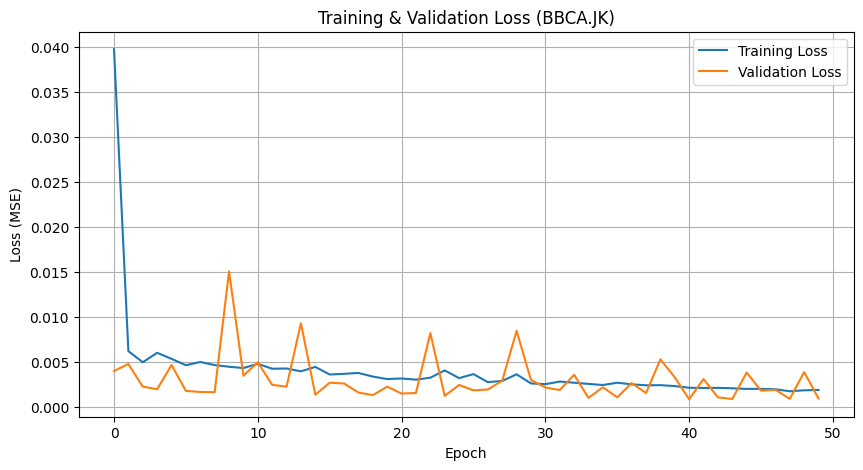

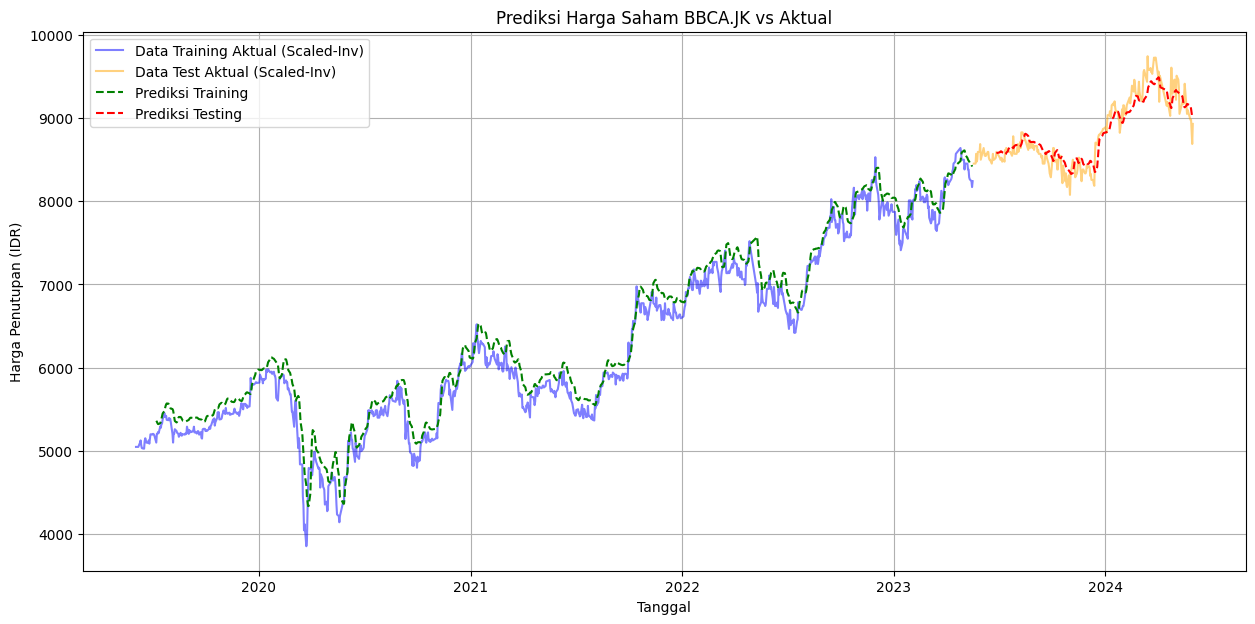

Model untuk BBCA.JK disimpan di: streamlit_deployment_artifacts/BBCA.JK_model.keras
Scaler untuk BBCA.JK disimpan di: streamlit_deployment_artifacts/BBCA.JK_scaler.joblib
Time step untuk BBCA.JK adalah: 25

MEMPROSES SAHAM: BBRI.JK

--- Fase 2: Pra-Pemrosesan Data untuk BBRI.JK ---
Ukuran data training BBRI.JK: 972 baris
Ukuran data testing BBRI.JK: 243 baris
Normalisasi data selesai.

--- Fase 3: Persiapan Sekuens Time Step untuk BBRI.JK ---
Bentuk X_train: (946, 25, 1), y_train: (946,)
Bentuk X_test: (217, 25, 1), y_test: (217,)

--- Fase 4: Membangun Model LSTM untuk BBRI.JK ---
Model LSTM untuk BBRI.JK berhasil dibangun.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 25, 96)         │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 25, 96)         │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 25, 96)         │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 96)             │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,065 (1015.88 KB)

 Trainable params: 260,065 (1015.88 KB)

 Non-trainable params: 0 (0.00 B)


--- Fase 5: Melatih Model LSTM untuk BBRI.JK ---
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - loss: 0.0636 - val_loss: 0.0153
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0083 - val_loss: 0.0103
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 0.0057 - val_loss: 0.0080
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0060 - val_loss: 0.0102
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0058 - val_loss: 0.0075
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0048 - val_loss: 0.0114
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0057 - val_loss: 0.0105
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0055 - val_loss: 0.0061
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0048 - val_loss: 0.0058
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0050 - val_loss: 0.0054
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0053 - val_loss: 0.0059
Epoch 1

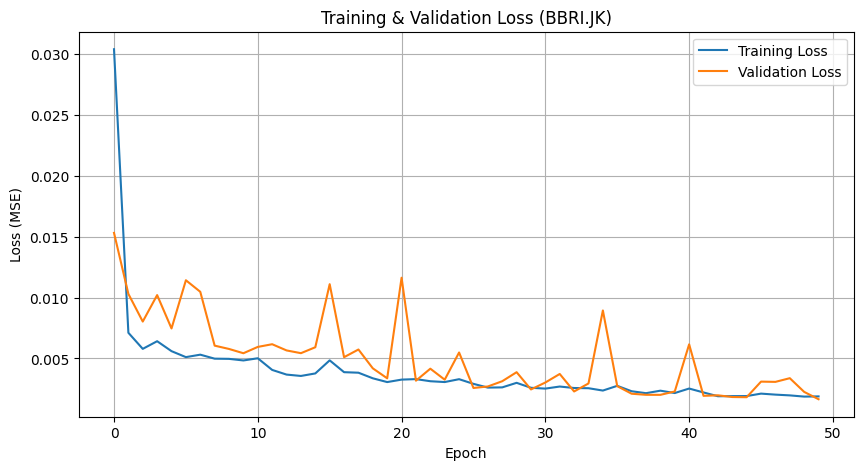

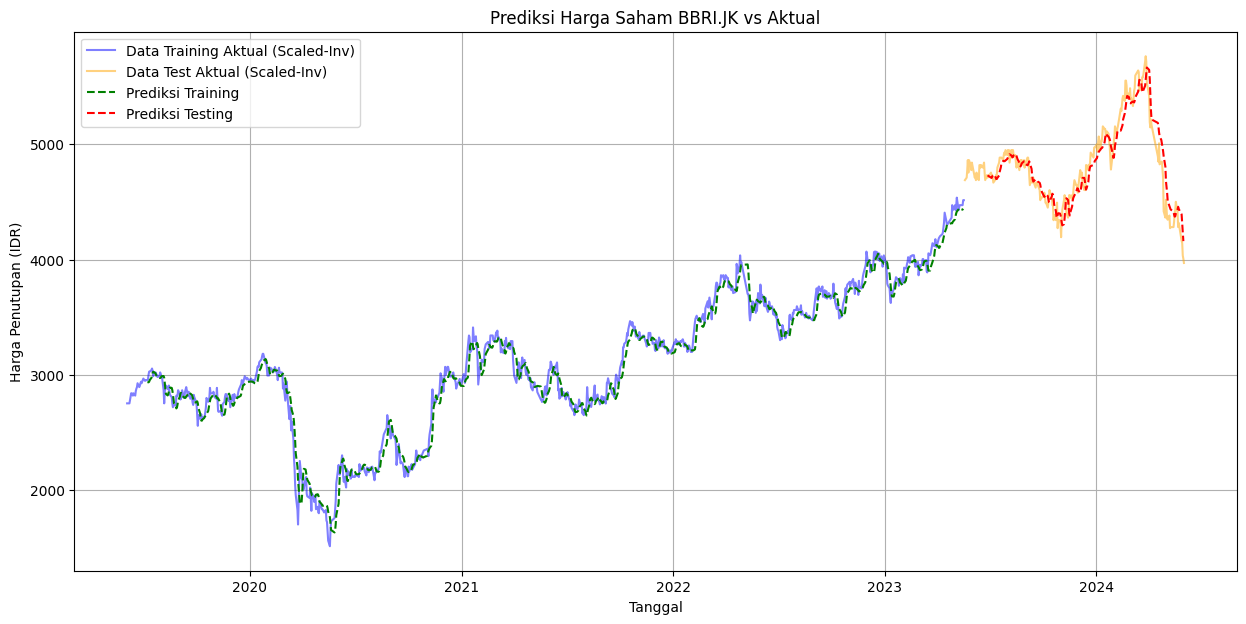

Model untuk BBRI.JK disimpan di: streamlit_deployment_artifacts/BBRI.JK_model.keras
Scaler untuk BBRI.JK disimpan di: streamlit_deployment_artifacts/BBRI.JK_scaler.joblib
Time step untuk BBRI.JK adalah: 25

MEMPROSES SAHAM: TLKM.JK

--- Fase 2: Pra-Pemrosesan Data untuk TLKM.JK ---
Ukuran data training TLKM.JK: 971 baris
Ukuran data testing TLKM.JK: 243 baris
Normalisasi data selesai.

--- Fase 3: Persiapan Sekuens Time Step untuk TLKM.JK ---
Bentuk X_train: (945, 25, 1), y_train: (945,)
Bentuk X_test: (217, 25, 1), y_test: (217,)

--- Fase 4: Membangun Model LSTM untuk TLKM.JK ---
Model LSTM untuk TLKM.JK berhasil dibangun.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 25, 96)         │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 25, 96)         │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 25, 96)         │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 96)             │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,065 (1015.88 KB)

 Trainable params: 260,065 (1015.88 KB)

 Non-trainable params: 0 (0.00 B)


--- Fase 5: Melatih Model LSTM untuk TLKM.JK ---
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - loss: 0.0934 - val_loss: 0.0081
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0073 - val_loss: 0.0062
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 397ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 0.0065 - val_loss: 0.0069
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0067 - val_loss: 0.0060
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0048 - val_loss: 0.0089
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 0.0050 - val_loss: 0.0061
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0060 - val_loss: 0.0036
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0053 - val_loss: 0.0038
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0052 - val_loss: 0.0055
Epoch

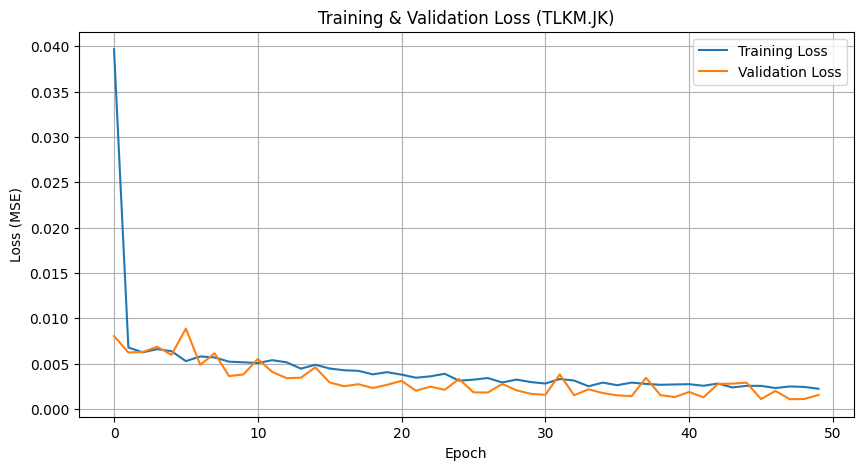

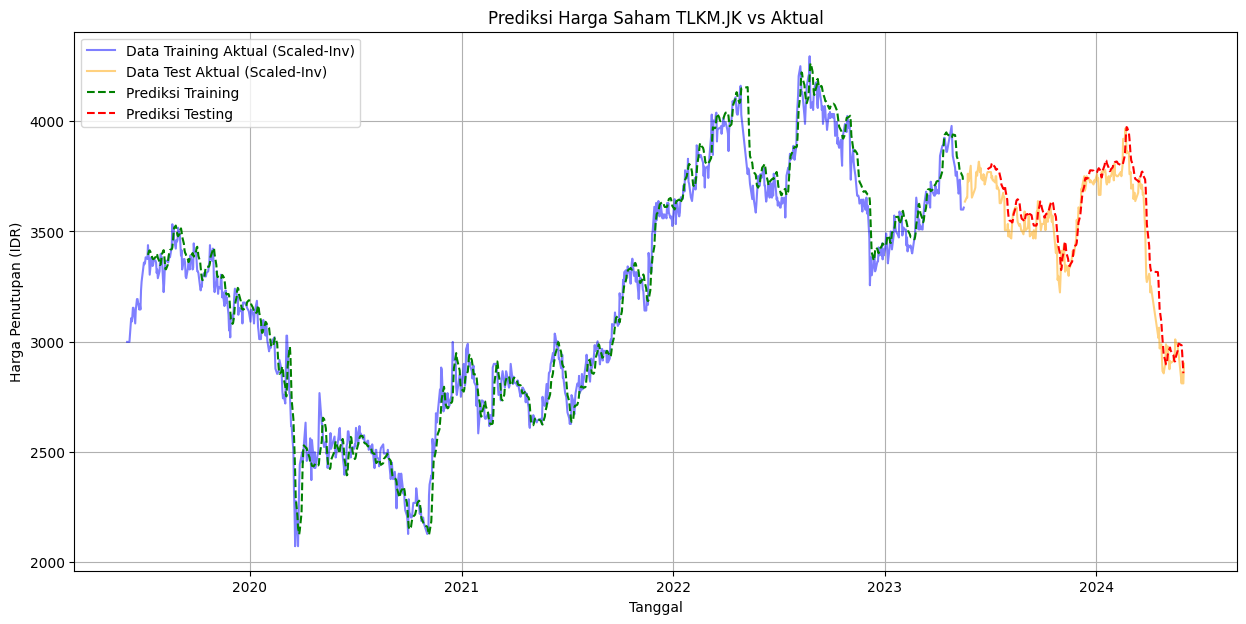

Model untuk TLKM.JK disimpan di: streamlit_deployment_artifacts/TLKM.JK_model.keras
Scaler untuk TLKM.JK disimpan di: streamlit_deployment_artifacts/TLKM.JK_scaler.joblib
Time step untuk TLKM.JK adalah: 25

MEMPROSES SAHAM: BMRI.JK

--- Fase 2: Pra-Pemrosesan Data untuk BMRI.JK ---
Ukuran data training BMRI.JK: 972 baris
Ukuran data testing BMRI.JK: 243 baris
Normalisasi data selesai.

--- Fase 3: Persiapan Sekuens Time Step untuk BMRI.JK ---
Bentuk X_train: (946, 25, 1), y_train: (946,)
Bentuk X_test: (217, 25, 1), y_test: (217,)

--- Fase 4: Membangun Model LSTM untuk BMRI.JK ---
Model LSTM untuk BMRI.JK berhasil dibangun.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 25, 96)         │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 25, 96)         │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 25, 96)         │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 96)             │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,065 (1015.88 KB)

 Trainable params: 260,065 (1015.88 KB)

 Non-trainable params: 0 (0.00 B)


--- Fase 5: Melatih Model LSTM untuk BMRI.JK ---
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - loss: 0.0741 - val_loss: 0.0068
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.0070 - val_loss: 0.0081
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0047 - val_loss: 0.0059
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0045 - val_loss: 0.0058
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0050 - val_loss: 0.0062
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - loss: 0.0040 - val_loss: 0.0085
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0050 - val_loss: 0.0283
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 0.0047 - val_loss: 0.0093
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0048 - val_loss: 0.0058
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0038 - val_loss: 0.0127
Epoch 1

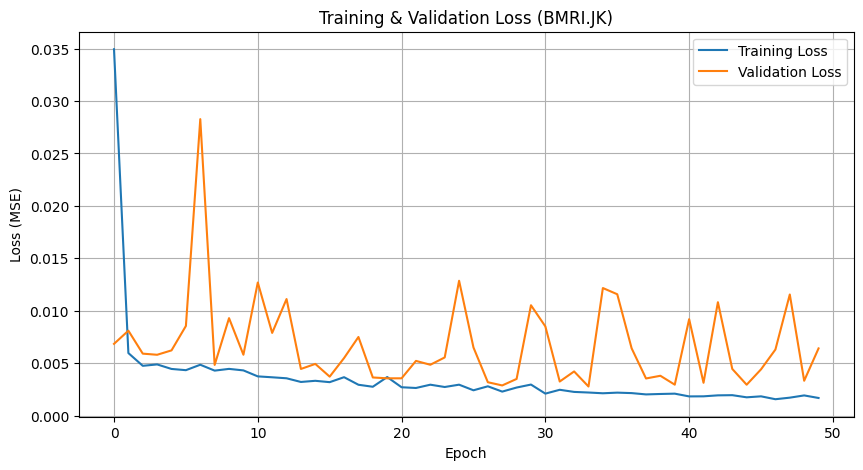

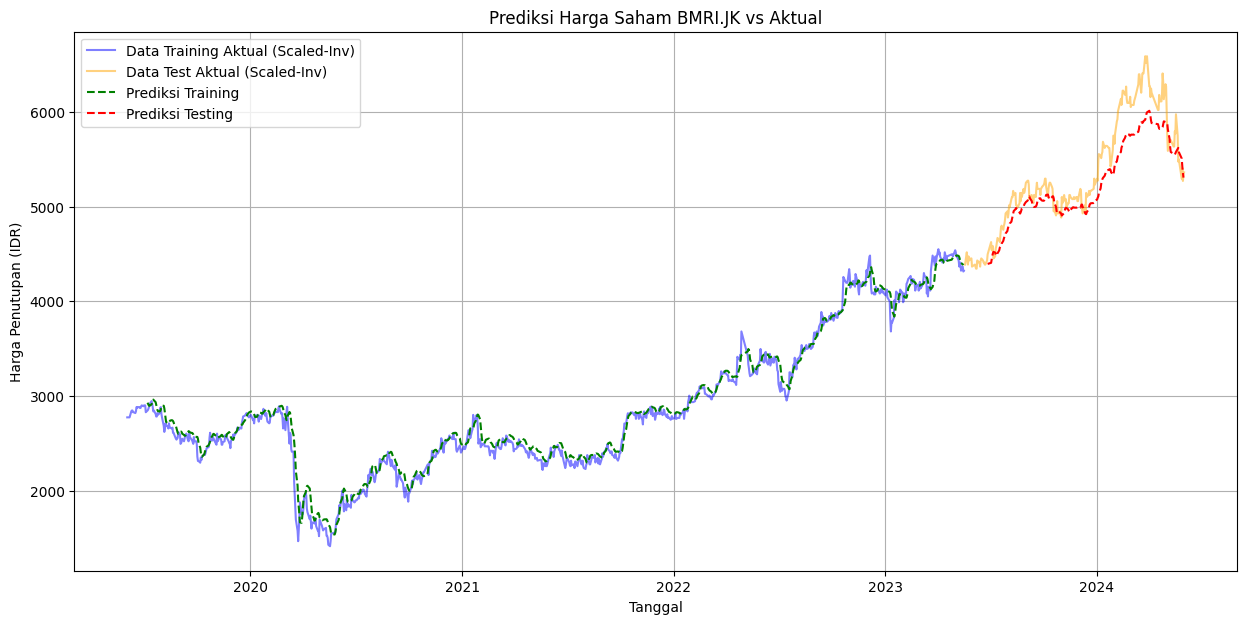

Model untuk BMRI.JK disimpan di: streamlit_deployment_artifacts/BMRI.JK_model.keras
Scaler untuk BMRI.JK disimpan di: streamlit_deployment_artifacts/BMRI.JK_scaler.joblib
Time step untuk BMRI.JK adalah: 25

MEMPROSES SAHAM: ASII.JK

--- Fase 2: Pra-Pemrosesan Data untuk ASII.JK ---
Ukuran data training ASII.JK: 971 baris
Ukuran data testing ASII.JK: 243 baris
Normalisasi data selesai.

--- Fase 3: Persiapan Sekuens Time Step untuk ASII.JK ---
Bentuk X_train: (945, 25, 1), y_train: (945,)
Bentuk X_test: (217, 25, 1), y_test: (217,)

--- Fase 4: Membangun Model LSTM untuk ASII.JK ---
Model LSTM untuk ASII.JK berhasil dibangun.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 25, 96)         │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 25, 96)         │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 25, 96)         │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 96)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 96)             │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,065 (1015.88 KB)

 Trainable params: 260,065 (1015.88 KB)

 Non-trainable params: 0 (0.00 B)


--- Fase 5: Melatih Model LSTM untuk ASII.JK ---
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - loss: 0.1239 - val_loss: 0.0058
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0121 - val_loss: 0.0039
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0100 - val_loss: 0.0043
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0084 - val_loss: 0.0017
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0078 - val_loss: 0.0020
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0083 - val_loss: 0.0015
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - loss: 0.0069 - val_loss: 0.0030
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0072 - val_loss: 0.0036
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0073 - val_loss: 0.0018
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.0055 - val_loss: 0.0014
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0064 - val_loss: 0.0027
Epoch 1

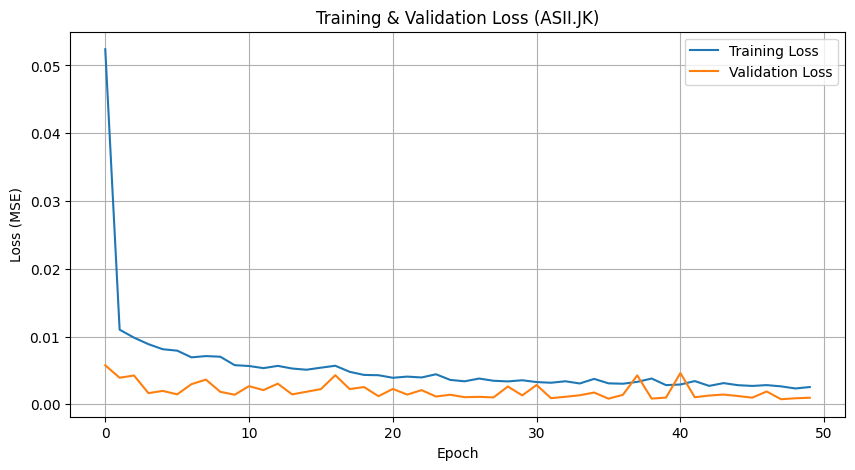

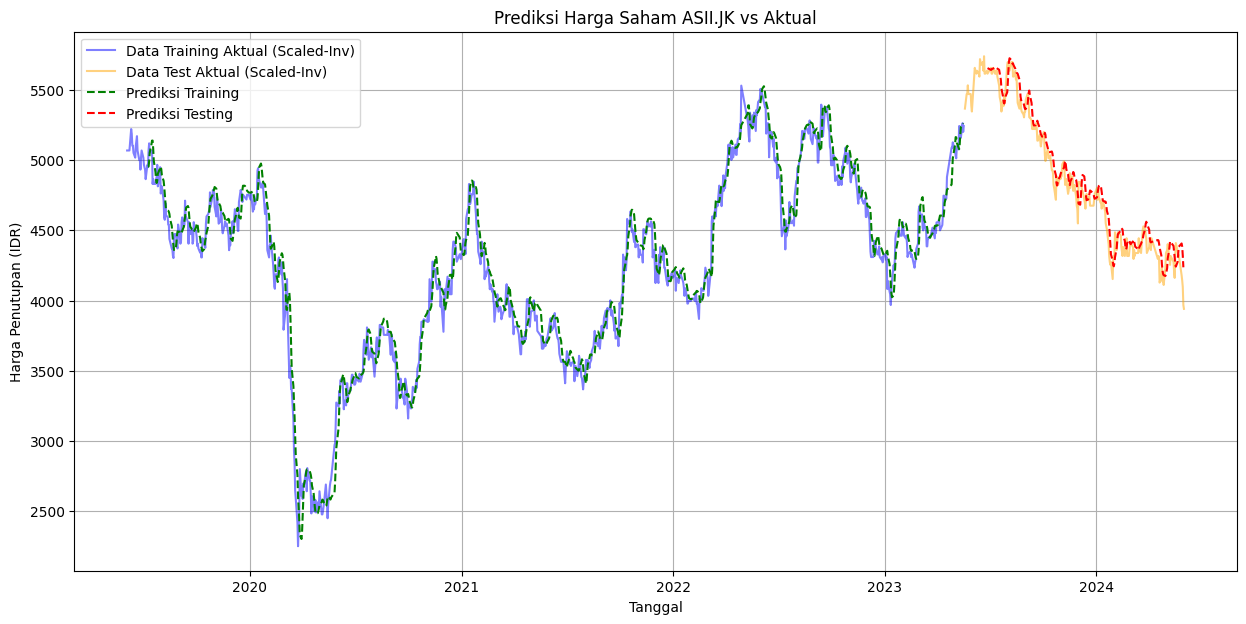

Model untuk ASII.JK disimpan di: streamlit_deployment_artifacts/ASII.JK_model.keras
Scaler untuk ASII.JK disimpan di: streamlit_deployment_artifacts/ASII.JK_scaler.joblib
Time step untuk ASII.JK adalah: 25


In [ ]:
# ===========================================================================
# Inisialisasi untuk Loop Pemrosesan per Saham
# ===========================================================================
print("\n--- MEMULAI PEMROSESAN PER SAHAM ---")

results_summary = {} # Untuk menyimpan ringkasan hasil MAPE per saham

# Cek apakah ada data saham untuk diproses
if not data_saham_all:
    print("Tidak ada data saham dalam 'data_saham_all' untuk diproses. Program berhenti sebelum loop utama.")
else:
    # Loop untuk setiap saham yang berhasil diunduh
    for ticker, df_original_saham in data_saham_all.items():
        print(f"\n==========================================================")
        print(f"MEMPROSES SAHAM: {ticker}")
        print(f"==========================================================")

        # --- Fase 2: Pra-Pemrosesan Data per Saham ---
        print(f"\n--- Fase 2: Pra-Pemrosesan Data untuk {ticker} ---")
        # 1. Pilih Fitur Target (Harga Penutupan)
        data_close = df_original_saham[['Close']].copy() # [cite: 42] (menggunakan harga penutupan)

        # 2. Pembagian Data (80% training, 20% testing)
        # [cite: 45] (penelitian ini menggunakan 80% data training dan 20% data testing)
        # Perlu cukup data untuk train & test setelah create_dataset nanti
        # Minimal (time_step + 1) untuk satu X,y pair. Kita butuh beberapa untuk train dan beberapa untuk test.
        # Misal, kita butuh setidaknya 2* (time_step+2) data poin.
        if len(data_close) < (TIME_STEP + 2) * 5: # Heuristik, pastikan cukup data
            print(f"Data untuk {ticker} terlalu sedikit ({len(data_close)} baris) untuk diproses dengan time_step {TIME_STEP}. Saham ini dilewati.")
            results_summary[ticker] = "Data terlalu sedikit untuk diproses"
            continue # Lanjut ke ticker berikutnya

        training_size = int(len(data_close) * 0.80)
        train_df = data_close[:training_size]
        test_df = data_close[training_size:]
        print(f"Ukuran data training {ticker}: {len(train_df)} baris")
        print(f"Ukuran data testing {ticker}: {len(test_df)} baris")

        if len(train_df) <= TIME_STEP + 1 or len(test_df) <= TIME_STEP + 1:
            print(f"Data training atau testing untuk {ticker} tidak cukup setelah dibagi untuk time_step {TIME_STEP}. Saham ini dilewati.")
            results_summary[ticker] = "Data train/test tidak cukup setelah split"
            continue

        # 3. Normalisasi Data (Min-Max Scaler)
        # [cite: 46, 53] (normalisasi data untuk mengubah range data menjadi interval 0-1)
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_train_data = scaler.fit_transform(train_df)
        scaled_test_data = scaler.transform(test_df)
        print("Normalisasi data selesai.")

        # --- Fase 3: Persiapan Data untuk LSTM (Membuat Sekuens Time Step) ---
        print(f"\n--- Fase 3: Persiapan Sekuens Time Step untuk {ticker} ---")
        X_train, y_train = create_dataset(scaled_train_data, TIME_STEP)
        X_test, y_test = create_dataset(scaled_test_data, TIME_STEP)

        if X_train.shape[0] == 0 or X_test.shape[0] == 0:
            print(f"Tidak cukup data untuk membuat sekuens training/testing untuk {ticker} dengan time_step {TIME_STEP} (setelah create_dataset). Saham ini dilewati.")
            results_summary[ticker] = "Tidak cukup data untuk membuat sekuens X,y"
            continue

        # Reshape input menjadi [samples, time_steps, features]
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
        print(f"Bentuk X_train: {X_train.shape}, y_train: {y_train.shape}")
        print(f"Bentuk X_test: {X_test.shape}, y_test: {y_test.shape}")

        # TODO: Lanjutkan dengan Fase 4 (Membangun Model LSTM), Fase 5 (Training Model),
        #       Fase 6 (Prediksi dan Evaluasi), dst., di dalam loop ini.
        #       Pastikan setiap langkah di dalam loop terindentasi dengan benar.

        # --- Fase 4: Membangun Model LSTM ---
        print(f"\n--- Fase 4: Membangun Model LSTM untuk {ticker} ---")
        tf.keras.backend.clear_session() # Membersihkan session Keras (baik untuk iterasi dalam notebook)
        model = Sequential()
        # Jurnal menggunakan multiple layer LSTM dengan 96 neuron [cite: 6, 56]
        # dan menguji 4 serta 8 layer [cite: 6, 56]
        # Arsitektur pada Gambar 4 (8 layer) menunjukkan Dropout setelah setiap LSTM layer.
        for i in range(N_LSTM_LAYERS):
            if i == 0: # Layer LSTM pertama
                model.add(LSTM(N_NEURONS, return_sequences=(N_LSTM_LAYERS > 1), input_shape=(TIME_STEP, 1)))
            elif i < N_LSTM_LAYERS - 1: # Layer LSTM tengah
                model.add(LSTM(N_NEURONS, return_sequences=True))
            else: # Layer LSTM terakhir
                model.add(LSTM(N_NEURONS, return_sequences=False))
            model.add(Dropout(DROPOUT_RATE)) # Menambahkan Dropout
        # Jurnal menyebutkan satu Dense layer untuk output [cite: 7]
        model.add(Dense(1)) # Output layer

        model.compile(optimizer='adam', loss='mean_squared_error')
        print(f"Model LSTM untuk {ticker} berhasil dibangun.")
        model.summary()
        # Akhir "Sel 6" konseptual.

        # --- Fase 5: Melatih Model LSTM ---
        print(f"\n--- Fase 5: Melatih Model LSTM untuk {ticker} ---")
        # Jurnal menguji berbagai epoch [cite: 5, 66, 68, 112]
        history = model.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE,
                            verbose=1) # Ubah ke 0 atau 2 jika tidak ingin output banyak per epoch
        print("Pelatihan model selesai.")
        # Akhir "Sel 7" konseptual.

        # --- Fase 6: Membuat Prediksi & Denormalisasi ---
        print(f"\n--- Fase 6: Membuat Prediksi & Denormalisasi untuk {ticker} ---")
        train_predict_scaled = model.predict(X_train)
        test_predict_scaled = model.predict(X_test)

        # Denormalisasi menggunakan scaler yang sudah disimpan [cite: 48]
        train_predict = scaler.inverse_transform(train_predict_scaled)
        test_predict = scaler.inverse_transform(test_predict_scaled)

        # Denormalisasi y_train dan y_test untuk perhitungan MAPE yang akurat
        # dan untuk plotting jika diperlukan
        y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
        y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
        print("Prediksi dan denormalisasi selesai.")
        # Akhir "Sel 8" konseptual.

        # --- Fase 7: Evaluasi Model (MAPE) ---
        print(f"\n--- Fase 7: Evaluasi Model untuk {ticker} ---")
        # Jurnal menggunakan Mean Absolute Percentage Error (MAPE) [cite: 94]

        mape_test = np.nan # Default
        if len(y_test_actual) > 0: # Pastikan ada data untuk dihitung
            # Penanganan nilai aktual nol untuk MAPE
            non_zero_mask_test = y_test_actual.flatten() != 0
            if np.sum(non_zero_mask_test) > 0 : # Pastikan masih ada data non-nol
                y_test_actual_filt = y_test_actual.flatten()[non_zero_mask_test]
                test_predict_filt = test_predict.flatten()[non_zero_mask_test]
                if len(y_test_actual_filt) == len(test_predict_filt): # Pastikan panjang array sama
                     mape_test = mean_absolute_percentage_error(y_test_actual_filt, test_predict_filt) * 100
                else:
                    print("Peringatan: Ketidaksesuaian panjang array setelah filter nol untuk MAPE test.")
            else:
                print("Peringatan: Semua nilai aktual pada data test adalah nol atau data test kosong setelah filter.")
        else:
            print("Peringatan: y_test_actual kosong, tidak bisa menghitung MAPE test.")

        mape_train = np.nan
        if len(y_train_actual) > 0:
            non_zero_mask_train = y_train_actual.flatten() != 0
            if np.sum(non_zero_mask_train) > 0:
                y_train_actual_filt = y_train_actual.flatten()[non_zero_mask_train]
                train_predict_filt = train_predict.flatten()[non_zero_mask_train]
                if len(y_train_actual_filt) == len(train_predict_filt):
                    mape_train = mean_absolute_percentage_error(y_train_actual_filt, train_predict_filt) * 100
                else:
                    print("Peringatan: Ketidaksesuaian panjang array setelah filter nol untuk MAPE train.")
            else:
                 print("Peringatan: Semua nilai aktual pada data train adalah nol atau data train kosong setelah filter.")
        else:
            print("Peringatan: y_train_actual kosong, tidak bisa menghitung MAPE train.")

        print(f"MAPE pada Data Training {ticker}: {mape_train:.4f}%" if not np.isnan(mape_train) else "MAPE Training: N/A")
        print(f"MAPE pada Data Testing {ticker}: {mape_test:.4f}%" if not np.isnan(mape_test) else "MAPE Testing: N/A")

        kategori_performa = "N/A"
        if not np.isnan(mape_test):
            results_summary[ticker] = {'MAPE_Train': mape_train, 'MAPE_Test': mape_test}
            # Pengelompokan MAPE sesuai Tabel 2 pada jurnal [cite: 97, 98, 99]
            if mape_test < 10: kategori_performa = "Performa model prediksi akurat"
            elif 10 <= mape_test <= 20: kategori_performa = "Performa model prediksi baik"
            elif 20 < mape_test <= 50: kategori_performa = "Performa model prediksi layak"
            else: kategori_performa = "Performa model prediksi tidak akurat"
            print(f"Kategori Performa Model (Testing) {ticker}: {kategori_performa}")
            results_summary[ticker]['Kategori_Test'] = kategori_performa
        else:
            results_summary[ticker] = "MAPE Testing tidak dapat dihitung"
        # Akhir "Sel 9" konseptual.

        # --- Fase 8: Visualisasi Hasil per Saham ---
        print(f"\n--- Fase 8: Visualisasi Hasil untuk {ticker} ---")
        # 1. Plot Loss
        plt.figure(figsize=(10,5))
        plt.plot(history.history['loss'], label='Training Loss')
        if 'val_loss' in history.history: # val_loss mungkin tidak ada jika validation_data tidak diberikan/kosong
            plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training & Validation Loss ({ticker})')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # 2. Plot Prediksi vs Aktual
        # Membuat DataFrame untuk plotting agar lebih mudah mengatur indeks tanggal

        # Indeks untuk data aktual yang digunakan untuk prediksi (setelah create_dataset)
        # Data asli sebelum normalisasi: df_original_saham['Close']
        # Data training asli sebelum normalisasi: train_df['Close']
        # Data testing asli sebelum normalisasi: test_df['Close']

        # Plotting train predictions
        train_predict_plot = np.empty_like(data_close)
        train_predict_plot[:, :] = np.nan
        # y_train_actual adalah harga aktual yang sesuai dengan train_predict
        # Mulai dari time_step karena data pertama X_train adalah dari indeks time_step
        # dan y_train adalah dari indeks time_step + time_step (jika melihat data asli)
        # atau lebih mudahnya, y_train adalah target dari X_train,
        # X_train[0] dibuat dari data[0:time_step], y_train[0] adalah data[time_step] (setelah normalisasi)
        # Jadi, train_predict[0] memprediksi scaled_train_data[time_step]
        # Indeks pada `train_df` adalah `time_step` hingga `len(y_train_actual) + time_step -1`
        if len(y_train_actual) > 0:
             # This line plotting actuals corresponding to train_predict
             # The indices should correspond to the original data points that y_train_actual represents
             # which are the training data points starting from index TIME_STEP relative to the start of train_df
             # train_df is data_close[:training_size]
             # So, the index in df_original_saham starts from TIME_STEP and ends at training_size -1
             # y_train_actual has shape (len(train_df) - time_step - 1, 1)
             # The corresponding indices in df_original_saham are from `time_step` to `len(y_train_actual) + time_step -1` (relative to the start of df_original_saham)
             # train_predict_plot[TIME_STEP : len(y_train_actual) + TIME_STEP, :] = y_train_actual # This line was plotting actuals

             pass # We will plot the original scaled_train_data and scaled_test_data directly later


        # Plotting test predictions
        test_predict_plot = np.empty_like(data_close)
        test_predict_plot[:, :] = np.nan
        # test_predict memprediksi y_test. y_test_actual adalah nilai sebenarnya.
        # Indeksnya dimulai dari awal test_df + TIME_STEP
        if len(y_test_actual) > 0:
            # This line plotting actuals corresponding to test_predict
            # The indices should correspond to the original data points that y_test_actual represents
            # which are the testing data points starting from index TIME_STEP relative to the start of test_df
            # test_df is data_close[training_size:]
            # So, the index in df_original_saham starts from training_size + TIME_STEP
            # y_test_actual has shape (len(test_df) - time_step - 1, 1)
            # The corresponding indices in df_original_saham are from `training_size + time_step` to `training_size + time_step + len(y_test_actual) -1`
            # test_predict_plot[training_size + TIME_STEP : training_size + TIME_STEP + len(y_test_actual) , :] = y_test_actual # This line was plotting actuals
            pass # We will plot the original scaled_train_data and scaled_test_data directly later


        plt.figure(figsize=(15,7))

        # Plot the actual training data
        # Use the index slice that corresponds to the training data
        plt.plot(df_original_saham.index[:training_size], scaler.inverse_transform(scaled_train_data), label='Data Training Aktual (Scaled-Inv)', alpha=0.5, color='blue')

        # Plot the actual testing data
        # Use the index slice that corresponds to the testing data
        plt.plot(df_original_saham.index[training_size:], scaler.inverse_transform(scaled_test_data), label='Data Test Aktual (Scaled-Inv)', alpha=0.5, color='orange')

        # Untuk plot prediksi, kita perlu mengatur indeksnya dengan benar
        # Indeks untuk prediksi training
        # train_predict corresponds to y_train_actual
        # y_train_actual are the actual values predicted by the model, which are the values at time_step + 1 onwards in the training data
        # The indices for train_predict should start from TIME_STEP within the training period
        idx_train_pred = df_original_saham.index[TIME_STEP : len(train_predict) + TIME_STEP]
        if len(idx_train_pred) == len(train_predict):
             plt.plot(idx_train_pred, train_predict, label='Prediksi Training', linestyle='--', color='green')

        # Indeks untuk prediksi testing
        # test_predict corresponds to y_test_actual
        # y_test_actual are the actual values predicted by the model, which are the values at time_step + 1 onwards in the testing data
        # The indices for test_predict should start from training_size + TIME_STEP
        idx_test_pred_start = training_size + TIME_STEP
        idx_test_pred = df_original_saham.index[idx_test_pred_start : idx_test_pred_start + len(test_predict)]
        if len(idx_test_pred) == len(test_predict) :
            plt.plot(idx_test_pred, test_predict, label='Prediksi Testing', linestyle='--', color='red')

        plt.title(f'Prediksi Harga Saham {ticker} vs Aktual')
        plt.xlabel('Tanggal')
        plt.ylabel('Harga Penutupan (IDR)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # --- MENYIMPAN MODEL, SCALER, DAN TIME STEP ---
        model_final = f"{ticker}_model.keras" # Menggunakan format .keras modern
        scaler_final = f"{ticker}_scaler.joblib"

        model_path = os.path.join(SAVE_DIR, model_final)
        scaler_path = os.path.join(SAVE_DIR, scaler_final)

        model.save(model_path)
        joblib.dump(scaler, scaler_path)

        deployment_configs[ticker] = {
            "model_path": model_path,
            "scaler_path": scaler_path,
            "time_step": TIME_STEP # time_step yang digunakan untuk model ini
        }
        print(f"Model untuk {ticker} disimpan di: {model_path}")
        print(f"Scaler untuk {ticker} disimpan di: {scaler_path}")
        print(f"Time step untuk {ticker} adalah: {TIME_STEP}")
        # ----------------------------------------------
        # Akhir "Sel 10" konseptual dan akhir dari loop utama per saham.
    # Pastikan ini ada di luar loop jika `data_saham_all` kosong
    if not data_saham_all:
        print("Loop utama tidak dijalankan karena tidak ada data saham yang valid.")



In [ ]:
# ===========================================================================
# Ringkasan Hasil Akhir
# ===========================================================================
print("\n==========================================================")
print("RINGKASAN HASIL SEMUA SAHAM")
print("==========================================================")
if not results_summary:
    print("Tidak ada hasil untuk dirangkum.")
else:
    for ticker, result in results_summary.items():
        if isinstance(result, dict):
            mape_train_val = result.get('MAPE_Train', float('nan'))
            mape_test_val = result.get('MAPE_Test', float('nan'))
            kategori_val = result.get('Kategori_Test', 'N/A')

            print(f"Saham: {ticker} -> MAPE Training: {mape_train_val:.2f}%,"
                  f" MAPE Testing: {mape_test_val:.2f}%,"
                  f" Kategori (Test): {kategori_val}")
        else:
            print(f"Saham: {ticker} -> {result}")

print("\n--- PROSES KESELURUHAN SELESAI ---")


RINGKASAN HASIL SEMUA SAHAM
Saham: BBCA.JK -> MAPE Training: 2.86%, MAPE Testing: 1.35%, Kategori (Test): Performa model prediksi akurat
Saham: BBRI.JK -> MAPE Training: 2.26%, MAPE Testing: 1.99%, Kategori (Test): Performa model prediksi akurat
Saham: TLKM.JK -> MAPE Training: 2.00%, MAPE Testing: 2.00%, Kategori (Test): Performa model prediksi akurat
Saham: BMRI.JK -> MAPE Training: 2.67%, MAPE Testing: 3.60%, Kategori (Test): Performa model prediksi akurat
Saham: ASII.JK -> MAPE Training: 2.31%, MAPE Testing: 1.75%, Kategori (Test): Performa model prediksi akurat

--- PROSES KESELURUHAN SELESAI ---


In [ ]:
from google.colab import files
import shutil
import os

# --- Ganti dengan nama folder Anda ---
folder_name = 'streamlit_deployment_artifacts' # Misalnya: 'streamlit_deployment_artifacts_v2'
# --- Ganti dengan path ke folder Anda jika tidak di root content ---
folder_path = f'/content/{folder_name}'

# --- Nama untuk file arsip ZIP ---
archive_name = f'{folder_name}.zip'
archive_path = f'/content/{archive_name}'

# Periksa apakah folder ada
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    print(f"Mengompres folder '{folder_name}' menjadi '{archive_name}'...")
    # Buat arsip ZIP dari folder
    shutil.make_archive(base_name=folder_name, # Nama arsip tanpa ekstensi
                        format='zip',         # Format arsip
                        root_dir='/content',  # Direktori root untuk path di dalam arsip
                        base_dir=folder_name) # Direktori yang akan diarsip (relatif terhadap root_dir)

    print(f"Folder '{folder_name}' berhasil dikompres menjadi '{archive_path}'.")

    # Unduh file ZIP
    print(f"Memulai pengunduhan '{archive_name}'...")
    files.download(archive_path)
    print(f"Jika unduhan tidak dimulai secara otomatis, periksa izin pop-up di browser Anda.")
else:
    print(f"Error: Folder '{folder_path}' tidak ditemukan atau bukan sebuah direktori.")
    print("Pastikan 'folder_name' dan 'folder_path' sudah benar.")

Mengompres folder 'streamlit_deployment_artifacts' menjadi 'streamlit_deployment_artifacts.zip'...
Folder 'streamlit_deployment_artifacts' berhasil dikompres menjadi '/content/streamlit_deployment_artifacts.zip'.
Memulai pengunduhan 'streamlit_deployment_artifacts.zip'...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Jika unduhan tidak dimulai secara otomatis, periksa izin pop-up di browser Anda.
